In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import ast
import math
import numpy as np
from collections import defaultdict
import re

In [3]:
test_full_data = pd.read_csv("./ukiyo-e_artworks_labels.csv")
test_full_data['LABELS'] = test_full_data['LABELS'].apply(lambda x: ast.literal_eval(x))
print(len(test_full_data))
test_full_data.tail(3)

177985


,Unnamed: 0,Image URL,Artist,Title,Date,Details,Source,Description,Similar Prints,LABELS
177982,177982,https://data.ukiyo-e.org/artelino/scaled/31208...,Kusaka Kenji,Mt.Fuji is seen around Miya,1949.,http://www.artelino.com/archive/archivesearch_...,http://artelino.com/,"""Fuji Miya Fukin"". Mt. Fuji is seen from the a...","['https://ukiyo-e.org/image/artelino/19069g1',...","[see, area, near, see, around]"
177983,177983,https://data.ukiyo-e.org/artelino/scaled/50236...,Kusaka Kenji,Kiyomizu Temple,1948..,http://www.artelino.com/archive/archivesearch_...,http://artelino.com/,The performance platform of Kiyomizu temple in...,['https://ukiyo-e.org/image/jaodb/Kawai_Kenji-...,"[performance, platform, temple, autumn, temple]"
177984,177984,https://data.ukiyo-e.org/artelino/scaled/15906...,Kusaka Kenji,Ski Slope in Akino,Ca. 1950s.,http://www.artelino.com/archive/archivesearch_...,http://artelino.com/,Ski Slope in Akino.,['https://ukiyo-e.org/image/jaodb/Kawai_Kenji-...,"[ski, slope, ski, slope]"


In [4]:
keywords = ['Emperor', 'Shogun', 'Minister', 'Vote', 'Constitution',
              'Courtroom', 'Contract', 'Patent', 'Judge', 'Lawyer', 'Police', 'Prison',
              'School', 'Uniform', 'Textbook', 'Scientific instrument',
              'Steamship', 'Telegraph', 'Brick',
              'Factory', 'Steam', 'Worker', 'Railway', 'Train',
              'Soldier', 'Gun', 'Warship',
              'Kimono', 'Suit', 'Gown', 'Glove']

keywords = [x.lower() for x in keywords]

In [5]:
def kw_in_labels(labels):
    res = {k: 0 for k in keywords}
    for l in labels:
        if (l in keywords):
            res[l] = res[l] + 1
    return res

test_full_data['kws2'] = test_full_data['LABELS'].apply(lambda x: kw_in_labels(x))
test_full_data[['LABELS', 'kws2']].head()

full_res = {k: 0 for k in keywords}

# make the huge dictionary
for _, d in test_full_data.iterrows():
    dico = d.kws2
    for k in keywords:
        full_res[k] = full_res[k] + dico[k]

print(full_res)

{'emperor': 699, 'shogun': 335, 'minister': 65, 'vote': 0, 'constitution': 31, 'courtroom': 0, 'contract': 17, 'patent': 120, 'judge': 47, 'lawyer': 0, 'police': 40, 'prison': 9, 'school': 282, 'uniform': 33, 'textbook': 4, 'scientific instrument': 0, 'steamship': 16, 'telegraph': 9, 'brick': 24, 'factory': 21, 'steam': 73, 'worker': 102, 'railway': 45, 'train': 85, 'soldier': 213, 'gun': 98, 'warship': 30, 'kimono': 1372, 'suit': 42, 'gown': 28, 'glove': 12}


In [6]:
kws_nonzero = [k for (k, v) in full_res.items() if (v > 0)]
print(kws_nonzero)
print(len(kws_nonzero))

['emperor', 'shogun', 'minister', 'constitution', 'contract', 'patent', 'judge', 'police', 'prison', 'school', 'uniform', 'textbook', 'steamship', 'telegraph', 'brick', 'factory', 'steam', 'worker', 'railway', 'train', 'soldier', 'gun', 'warship', 'kimono', 'suit', 'gown', 'glove']
27


### DO NOT RE-RUN -------------------------------------------------------------------------------------------

In [10]:
dico_per_image = test_full_data[['kws2']]
type(dico_per_image)
test_full_data[['kws2']].head()

,kws2
0,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
1,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
2,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
3,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."
4,"{'emperor': 0, 'shogun': 0, 'minister': 0, 'vo..."


In [11]:
word_matrix = pd.DataFrame(index=np.arange(len(dico_per_image)), columns=full_res.keys())

for i, d in dico_per_image.iterrows():
    dico = d['kws2']
    for k in dico.keys():
        word_matrix[k].loc[i] = dico[k]

In [13]:
print(word_matrix)
word_matrix.to_csv('./keyword_matrix.csv')

       emperor shogun minister vote constitution courtroom contract patent  \
0            0      0        0    0            0         0        0      0   
1            0      0        0    0            0         0        0      0   
2            0      0        0    0            0         0        0      0   
3            0      0        0    0            0         0        0      0   
4            0      0        0    0            0         0        0      0   
...        ...    ...      ...  ...          ...       ...      ...    ...   
177980       0      0        0    0            0         0        0      0   
177981       0      0        0    0            0         0        0      0   
177982       0      0        0    0            0         0        0      0   
177983       0      0        0    0            0         0        0      0   
177984       0      0        0    0            0         0        0      0   

       judge lawyer  ... worker railway train soldier gun warsh

### DO NOT RE-RUN : END ----------------------------------------------------

After this, two things to do:

- Calculate similarity (find package, and get similarity from the word_matrix I'm creating)
- Merge the full_test_data with the time dataframe, and for each keyword in the kws, create a graph showing time evolution of the word's appearance.

In [7]:
kws = pd.read_csv('./keyword_matrix.csv').rename(columns={'Unnamed: 0': 'index'})
kws.tail(3)

,index,emperor,shogun,minister,vote,constitution,courtroom,contract,patent,judge,...,worker,railway,train,soldier,gun,warship,kimono,suit,gown,glove
177982,177982,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177983,177983,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
177984,177984,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
dates = test_full_data[['Title', 'Date', 'Artist', 'Image URL']].reset_index()
dates.head()

,index,Title,Date,Artist,Image URL
0,0,NaN,1711,Okumura Masanobu,https://data.ukiyo-e.org/bm/scaled/AN00418884_...
1,1,Actor Sanogawa Ichimatsu as a Falconer,1740,Okumura Masanobu,https://data.ukiyo-e.org/mfa/scaled/sc220382.jpg
2,2,Courtesan likened to the Chinese sage Zhang Gu...,"[1715, printed later]",Okumura Masanobu,https://data.ukiyo-e.org/loc/scaled/02127v.jpg
3,3,NaN,1686-1764 (artist),Okumura Masanobu,https://data.ukiyo-e.org/bm/scaled/AN00420719_...
4,4,"Tsuri ---Ki no sendaku, from an untitled serie...","Japanese, Edo period",Okumura Masanobu,https://data.ukiyo-e.org/mfa/scaled/sc200151.jpg


In [19]:
kws_times = dates.merge(kws, on='index')
print(len(kws_times))
kws_times.head(1)

177985


,index,Title,Date,Artist,Image URL,emperor,shogun,minister,vote,constitution,...,worker,railway,train,soldier,gun,warship,kimono,suit,gown,glove
0,0,NaN,1711,Okumura Masanobu,https://data.ukiyo-e.org/bm/scaled/AN00418884_...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Re-do time extraction on every print instead of importing the ones with nouns
data_time = kws_times.copy(deep=True)

def get_year(date): # date must be a string
    regex = re.findall("\d\d\d\d", date)
    # special case of the 'ca. 1910-20', shouldn't that be an average
    if (len(regex) == 1):
        return int(regex[0]) # return the year
    if (len(regex) == 2):
        return math.floor((int(regex[0]) + int(regex[1]))/2) # as an estimate we take the mean of the proposed time period. How reliable?
    return 0 # If there is no year we return zero, which will be excluded from year analyses.

# what about the "originally in Edo period" ones
# and '17th - 18th' century
# will add them manually

def get_period_with_year(year):
    if (year >= 1603 and year < 1853):
        return "Edo (pre-opening)"
    if (year >= 1853 and year < 1868):
        return "Edo (open)"
    if (year >= 1868 and year < 1912):
        return "Meiji"
    return "other"

def get_period_with_artist(artist):
    if ((artist in early_artists) or (artist in birth_full_color_artists) or (artist in golden_age_artists) or (artist in popularization_artists)):
        return "Edo"
    if ((artist in meiji_artists)):
        return "Meiji"
    return "other"

def get_most_precise_period(entry):
    if (int(entry['Year']) != 0):
        return get_period_with_year(int(entry['Year']))
    return get_period_with_artist(str(entry['Artist']))

# refine this function with the artist lists

data_time['Year'] = data_time['Date'].apply(lambda x: get_year(str(x)))
# data_desc['Year and Artist'] = (data_desc['Year'], data_desc['Artist'])
# data_desc[['Title', 'Date', 'Year and Artist', 'Period']][data_desc['Year'] == 0].head(50)
data_time[['Title', 'Artist', 'Date', 'Year']]#[data_time['Year'] == 0]

,Title,Artist,Date,Year
0,NaN,Okumura Masanobu,1711,1711
1,Actor Sanogawa Ichimatsu as a Falconer,Okumura Masanobu,1740,1740
2,Courtesan likened to the Chinese sage Zhang Gu...,Okumura Masanobu,"[1715, printed later]",1715
3,NaN,Okumura Masanobu,1686-1764 (artist),1725
4,"Tsuri ---Ki no sendaku, from an untitled serie...",Okumura Masanobu,"Japanese, Edo period",0
...,...,...,...,...
177980,Kiyomizu Temple,Kusaka Kenji,Ca. 1950s.,1950
177981,Samegai in Shiga,Kusaka Kenji,Ca. 1950s.,1950
177982,Mt.Fuji is seen around Miya,Kusaka Kenji,1949.,1949
177983,Kiyomizu Temple,Kusaka Kenji,1948..,1948


In [26]:
# Goal: get, for one artist, all the years associated with them
# For works that don't have a year, put as year the averages of all the existing years
def avg_years_by_artist(data, artist):
    years = data[['Year']][data['Artist'] == artist]
    years = years[years['Year'] > 0]
    # ne pas inclure les zeros!!!
    mean_year = years.mean()
    if (math.isnan(mean_year)):
        return 0
    return int(np.round(mean_year))

# test
print(avg_years_by_artist(data_time, 'Okumura Masanobu'))

# print(data_time['Artist'].unique())

# default dict
mean_year_dict = defaultdict(list)

# create dictionary of average years
for artist in data_time['Artist'].unique():
    avg = avg_years_by_artist(data_time, artist)
    mean_year_dict[artist].append(avg)
    mean_year_dict[artist] = mean_year_dict[artist][0] # replace list with the int

def year_or_avg(artist, year):
    if (year == 0):
        return mean_year_dict[artist]
    return year

# replace the zeroes in the df by these averages
data_time['Year'] = data_time.apply(lambda x: year_or_avg(x.Artist, x.Year), axis=1)

print(len(data_time))
print(f"Works with missing years: {len(data_time[['Title', 'Artist', 'Date', 'Year']][data_time['Year'] == 0])}")

data_time[['Title', 'Artist', 'Date', 'Year']]#[data_time['Year'] == 0]

1733
177985
Works with missing years: 595


,Title,Artist,Date,Year
0,NaN,Okumura Masanobu,1711,1711
1,Actor Sanogawa Ichimatsu as a Falconer,Okumura Masanobu,1740,1740
2,Courtesan likened to the Chinese sage Zhang Gu...,Okumura Masanobu,"[1715, printed later]",1715
3,NaN,Okumura Masanobu,1686-1764 (artist),1725
4,"Tsuri ---Ki no sendaku, from an untitled serie...",Okumura Masanobu,"Japanese, Edo period",1733
...,...,...,...,...
177980,Kiyomizu Temple,Kusaka Kenji,Ca. 1950s.,1950
177981,Samegai in Shiga,Kusaka Kenji,Ca. 1950s.,1950
177982,Mt.Fuji is seen around Miya,Kusaka Kenji,1949.,1949
177983,Kiyomizu Temple,Kusaka Kenji,1948..,1948


In [31]:
# Adding the period labels
def get_period_from_year(year):
    if (year >= 1603 and year < 1853):
        return "Edo (pre-opening)"
    if (year >= 1853 and year < 1868):
        return "Edo (open)" # maybe put only one Edo instead, since with the averages the years might not be super precise :(
    if (year >= 1868 and year < 1912):
        return "Meiji"
    return "other"

data_time['Period'] = data_time['Year'].apply(lambda x: get_period_from_year(x))

# Possible periods: 'Edo (pre-opening)', 'Edo (open)', 'Meiji', 'other'
data_time[['Title', 'Artist', 'Date', 'Year', 'Period']][data_time['Period'] == 'Meiji']

,Title,Artist,Date,Year,Period
140,Flower Vendor,Okumura Masanobu,1868-1925,1896,Meiji
153,Poet (long format),Okumura Masanobu,Originally in Edo period. This is a re-carved ...,1900,Meiji
215,Poet (long format),Okumura Masanobu,Originally in Edo period. This is a re-carved ...,1900,Meiji
304,Italian Circus,Okumura Masanobu,1886,1886,Meiji
1758,Seven Mask - Kabuki Juhachi Ban,Torii Kiyotada I,1895.,1895,Meiji
...,...,...,...,...,...
170599,Black Cat - 黒猫,Takehisa Yumeji,1910,1910,Meiji
170612,Northern Winter - 北方の冬,Takehisa Yumeji,1910,1910,Meiji
170619,Picnic,Takehisa Yumeji,Ca. 1910-20.,1910,Meiji
174784,White Beret,Ikeda Shuzo,1884,1884,Meiji


In [33]:
kws_times2 = data_time[['Year', 'Period']][data_time['Year'] != 0].reset_index().merge(kws_times, on='index')
print(len(kws_times2))
kws_times2.head(2)

177390


,index,Year,Period,Title,Date,Artist,Image URL,emperor,shogun,minister,...,worker,railway,train,soldier,gun,warship,kimono,suit,gown,glove
0,0,1711,Edo (pre-opening),NaN,1711,Okumura Masanobu,https://data.ukiyo-e.org/bm/scaled/AN00418884_...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1740,Edo (pre-opening),Actor Sanogawa Ichimatsu as a Falconer,1740,Okumura Masanobu,https://data.ukiyo-e.org/mfa/scaled/sc220382.jpg,0,0,0,...,0,0,0,0,0,0,0,0,0,0


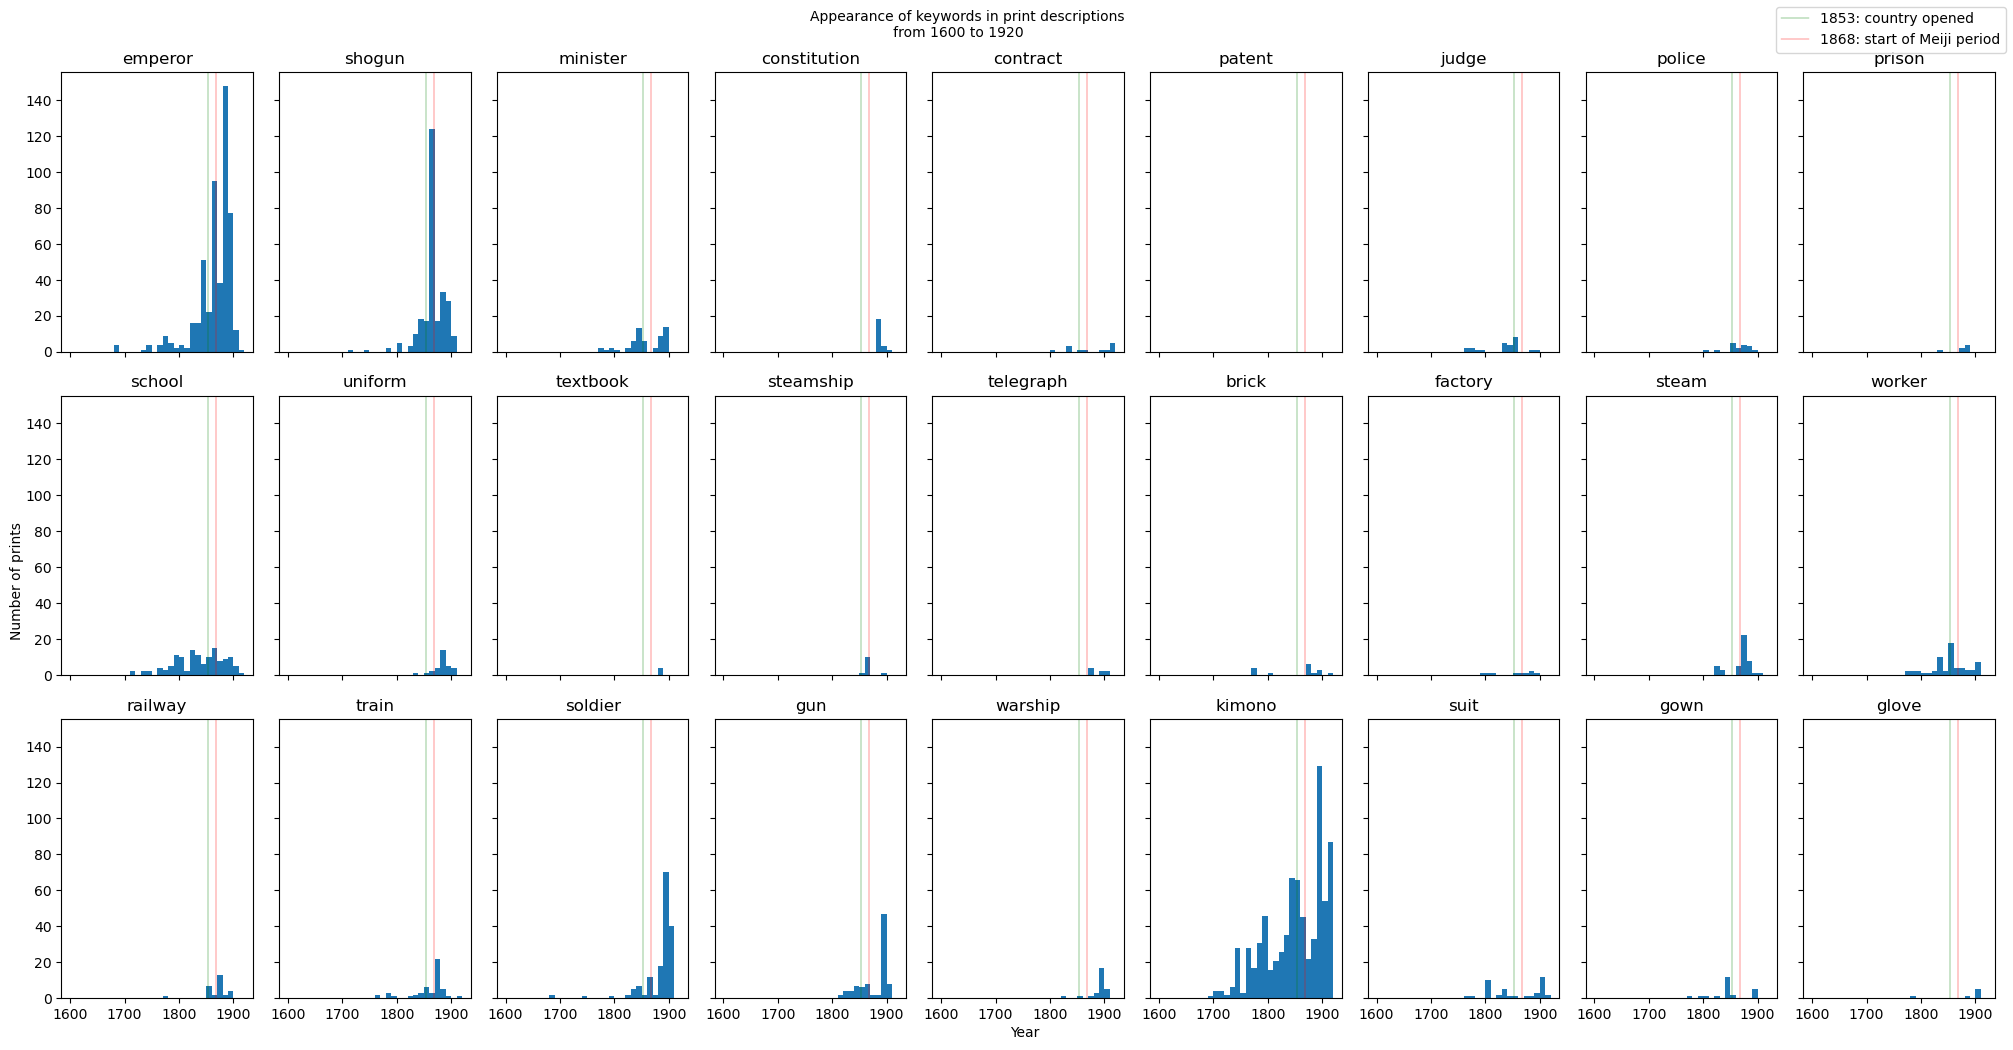

In [54]:
# making the graphs

fig, ax = plt.subplots(3,9,figsize= (20,10), sharey = True, sharex = True)

for i in range(len(kws_nonzero)):
    sbplt = ax[math.floor(i/9), i%9]
    k_test = kws_nonzero[i]
    df = kws_times2[['Year', k_test]]
    df = df[df[k_test]>0]
    sbplt.hist(df.Year, range=[1600, 1920], bins=32)
    if (i==0):
        sbplt.axvline(x=1853, color='green', linewidth=0.3, label='1853: country opened')
        sbplt.axvline(x=1868, color='red', linewidth=0.3, label='1868: start of Meiji period')
    else:
        sbplt.axvline(x=1853, color='green', linewidth=0.3)
        sbplt.axvline(x=1868, color='red', linewidth=0.3)
    sbplt.set_title(k_test)
    
fig.tight_layout()

fig.text(0.5,0, "Year")
fig.text(0,0.4, "Number of prints", rotation = 90)
fig.text(0.4, 1, "Appearance of keywords in print descriptions\n                   from 1600 to 1920") # the \n is to fit the legend correctly, spaces to center what's after the \n
fig.legend()